<a href="https://colab.research.google.com/github/sromanov103/sromanov103/blob/main/(machine_learning)_type_of_cyberbulling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Киберзапугивание** становится важной проблемой современного общества, поскольку оно может нанести серьёзный ущерб психическому и физическому здоровью жертв, способствовать развитию паранойи и страха за свою безопасность, а также ограничить свободу выражения мнений и самовыражения других людей. Это особенно актуально для молодых людей, которые могут стать объектами травли из-за своей внешности, религиозной или культурной принадлежности, сексуальной ориентации, гендерной идентичности или инвалидности. По этому данная тема является актуальной, я решил не оставаться в стороне и помочь с решением.

In [ ]:
#Загрузка датасета
import pandas as pd
df = pd.read_csv('cyberbullying_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
df.columns

Index(['tweet_text', 'cyberbullying_type'], dtype='object')

# После загрузки датасета проверим пропуски, дубликаты, поработаем с ними

In [ ]:
# Проверка наличия пропусков
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [ ]:
# Проверка наличия дубликатов
df.duplicated().sum()

36

In [ ]:
# Удаление дубликатов
df = df.drop_duplicates()

In [ ]:
# Функция для очистки текста
import re
def clean_text(text):
    # Удалениех небукных симво, кроме пролов
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Удаление лишних пробелов
    text = re.sub(r'\s+', ' ', text).strip()
    # Приведение текста к нижнему регистру
    text = text.lower()
    return text
# Применение функции к столбцу с текстом
df['tweet_text'] = df['tweet_text'].apply(clean_text)

In [ ]:
df.head()

,tweet_text,cyberbullying_type
0,in other words katandandre your food was crapi...,not_cyberbullying
1,why is aussietv so white mkr theblock imaceleb...,not_cyberbullying
2,xochitlsuckkks a classy whore or more red velv...,not_cyberbullying
3,jasongio meh p thanks for the heads up but not...,not_cyberbullying
4,rudhoeenglish this is an isis account pretendi...,not_cyberbullying


# Проведем разведочный анализ данных (проверим распределение значений по столбцам, взаимосвязи между столбцами набора данных, корреляцию значений столбцов)

In [ ]:
import pandas as pd

# Описание распределения значений по столбцам
df.describe()

,tweet_text,cyberbullying_type
count,47656,47656
unique,45838,6
top,,religion
freq,26,7997


In [ ]:
# Подсчет количества вхождений каждого типа cyberbullying
cyberbullying_counts = df['cyberbullying_type'].value_counts()
print("Количество вхождений каждого типа cyberbullying:\n", cyberbullying_counts)

Количество вхождений каждого типа cyberbullying:
 religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64


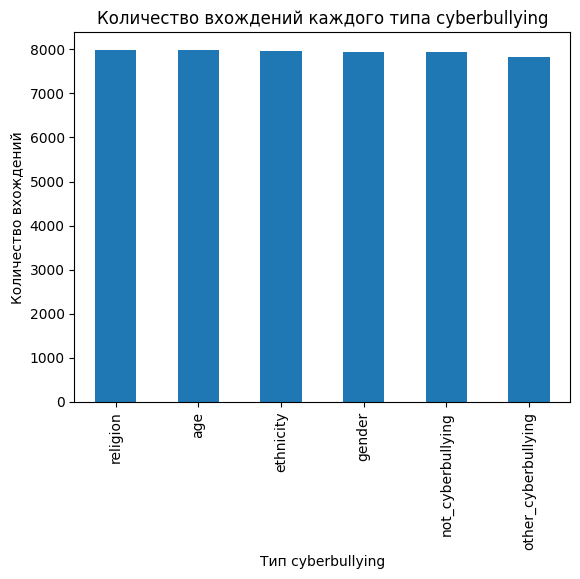

In [ ]:
#Построим столбчатую диаграмму по всем классам
import matplotlib.pyplot as plt

def plot_cyberbullying_counts(df):
    cyberbullying_counts = df['cyberbullying_type'].value_counts()
    cyberbullying_counts.plot(kind='bar')
    plt.title('Количество вхождений каждого типа cyberbullying')
    plt.xlabel('Тип cyberbullying')
    plt.ylabel('Количество вхождений')
    plt.show()

# Вызов функции plot_cyberbullying_counts перед разделением данных на обучающую и тестовую выборки
plot_cyberbullying_counts(df)

Как видно на графике соотношение типов cyberbylling'a одинаковы

# Затем разобьём данные на входной и выходной сигналы

In [ ]:
X = df['tweet_text']
y = df['cyberbullying_type']

# Разобьём значения x и y - на обучающее и тестовое множества

In [ ]:
#Разделим данные, 80% обучение и 20% для тестирования
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(len(X_train), len(X_test), len(y_train), len(y_test))
#Проверка разделения, где x_train - обучающая, где x_test - тестовая

38124 9532 38124 9532


# Обучим и сравним модели

In [ ]:
#Преобразуйте текст в числа
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)
#Для построения графика влияние признаков текста на принятие решения
featuredTextTest = vectorizer.transform(X_test)

In [ ]:
def print_classification__df(y_true, y_pred, class_names):
    labels = [x for x in set(y_true + y_pred)]
    y_true_encoded = [labels.index(x) for x in y_true]
    y_pred_encoded = [labels.index(x) for x in y_pred]
    handle = io.StringIO()
    result = subprocess.run(["python", "-m", "sklearn.metrics", "classification_report", "-c", "-o", "-"], input=("\n".join(["y_true={}\n{}".format(y_true_encoded, y_pred_encoded)]),), stdout=subprocess.PIPE, check=True)
    df_report = pd.read_csv(io.StringIO(result.stdout.decode()), delimiter='\t')
    df_report.insert(0, 'Class', class_names)
    print(df_report)

#Обучение модели SVC

In [ ]:
#Обучение модели
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state=42)
model.fit(X_train_counts, y_train)
# Вычисление предсказаний на тестовых данных
y_pred = model.predict(X_test_counts)

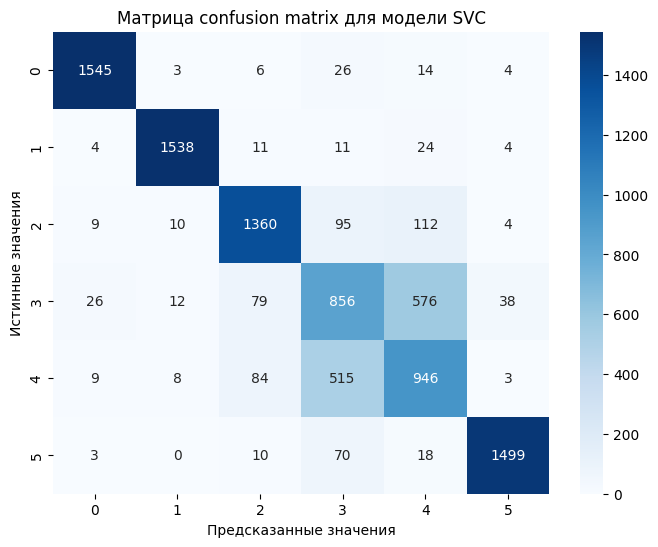

In [ ]:
# Вычисление матрицы confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, model.predict(X_test_counts))

# Визуализация матрицы confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица confusion matrix для модели SVC')
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.show()

Модель показала отличную точность, можно будет сравнить разные и определиться какая из них будет точнее

In [ ]:
# Тестирование модели
import numpy as np
#Для дальнейшего сравнения поместим результаты в DataFrame
test_results = pd.DataFrame(columns=['Model', 'Precision'])
# Вывод оценок точности для каждого класса
from sklearn.metrics import precision_score, f1_score


class_names = df['cyberbullying_type'].unique()

for class_name in class_names:
    y_true = y_test == class_name
    y_pred_class = y_pred == class_name
    f1 = f1_score(y_true, y_pred_class, average='binary')
    print(f"Для класса {class_name}: {f1:.4f}")
#Сохраним результаты тестирования
svc_f1 = np.mean(f1)
test_results = test_results.append({'Model': 'SVC', 'Precision': svc_f1}, ignore_index=True)
# Вывод среднего значения F1-score
print("\nТочность:", np.mean(f1))

Для класса not_cyberbullying: 0.5418
Для класса gender: 0.8662
Для класса religion: 0.9511
Для класса other_cyberbullying: 0.5813
Для класса age: 0.9674
Для класса ethnicity: 0.9725

Точность: 0.9724944672779007


<ipython-input-18-52e347bb6912>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results = test_results.append({'Model': 'SVC', 'Precision': svc_f1}, ignore_index=True)


#Обучение модели MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=1)
model.fit(X_train_counts, y_train)
# Вычисление предсказаний на тестовых данных
y_pred = model.predict(X_test_counts)

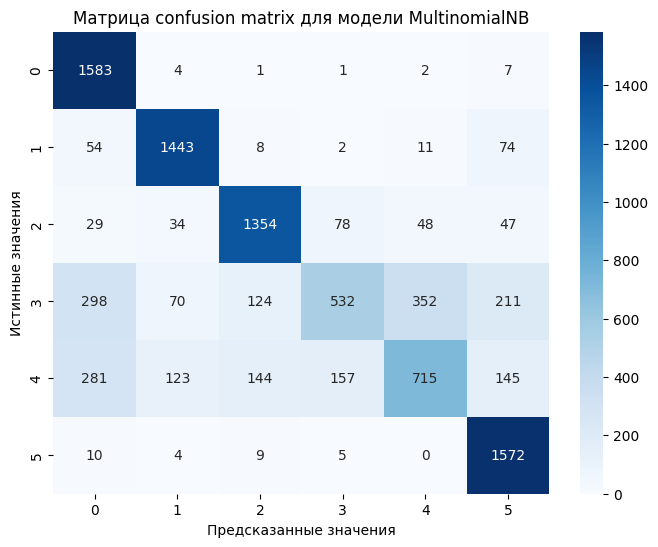

In [ ]:
# Вычисление матрицы confusion matrix для MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
# Визуализация матрицы confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица confusion matrix для модели MultinomialNB')
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.show()

Эта модель показала результат хуже всех

In [ ]:
# Тестирование модели
# Вывод оценок точности для каждого класса
from sklearn.metrics import precision_score

class_names = df['cyberbullying_type'].unique()

for class_name in class_names:
    y_true = y_test == class_name
    y_pred_class = y_pred == class_name
    f1 = f1_score(y_true, y_pred_class, average='binary')
    print(f"Для класса {class_name}: {f1:.4f}")
mn_f1 = np.mean(f1)
#Сохраним результаты тестирования
test_results = test_results.append({'Model': 'MultinomialNB', 'Precision': mn_f1}, ignore_index=True)
# Вывод среднего значения F1-score
print("\nТочность:", np.mean(f1))

Для класса not_cyberbullying: 0.4505
Для класса gender: 0.8384
Для класса religion: 0.8600
Для класса other_cyberbullying: 0.5310
Для класса age: 0.8217
Для класса ethnicity: 0.8826

Точность: 0.8825688073394496


<ipython-input-21-43ac500efd9c>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results = test_results.append({'Model': 'MultinomialNB', 'Precision': mn_f1}, ignore_index=True)


#Обучение модели Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)
model.fit(X_train_counts, y_train)
# Вычисление предсказаний на тестовых данных
y_pred = model.predict(X_test_counts)

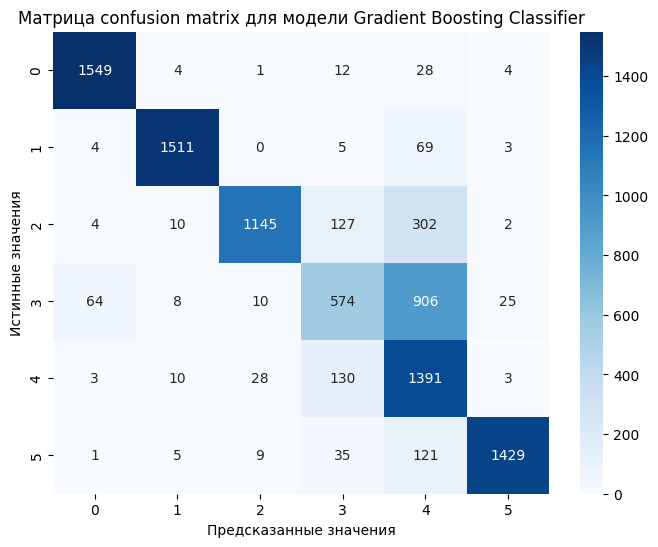

In [ ]:
# Вычисление матрицы confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Визуализация матрицы confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица confusion matrix для модели Gradient Boosting Classifier')
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.show()

Матрица показала хороший результат

In [ ]:
# Тестирование модели
# Вывод оценок точности для каждого класса
from sklearn.metrics import precision_score

class_names = df['cyberbullying_type'].unique()

for class_name in class_names:
    y_true = y_test == class_name
    y_pred_class = y_pred == class_name
    f1 = f1_score(y_true, y_pred_class, average='binary')
    print(f"Для класса {class_name}: {f1:.4f}")
#Сохранение результата тестирования
gb_f1 = np.mean(f1)
test_results = test_results.append({'Model': 'Gradient Boosting Classifier', 'Precision': gb_f1}, ignore_index=True)
# Вывод среднего значения F1-score
print("\nТочность:", np.mean(f1))

Для класса not_cyberbullying: 0.4648
Для класса gender: 0.8229
Для класса religion: 0.9322
Для класса other_cyberbullying: 0.6349
Для класса age: 0.9612
Для класса ethnicity: 0.9624

Точность: 0.962420382165605


<ipython-input-24-b712d646966d>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results = test_results.append({'Model': 'Gradient Boosting Classifier', 'Precision': gb_f1}, ignore_index=True)


#Модель SCV показала точность выше, значит будем использовать ее.

#Сравнение результатов тестирования

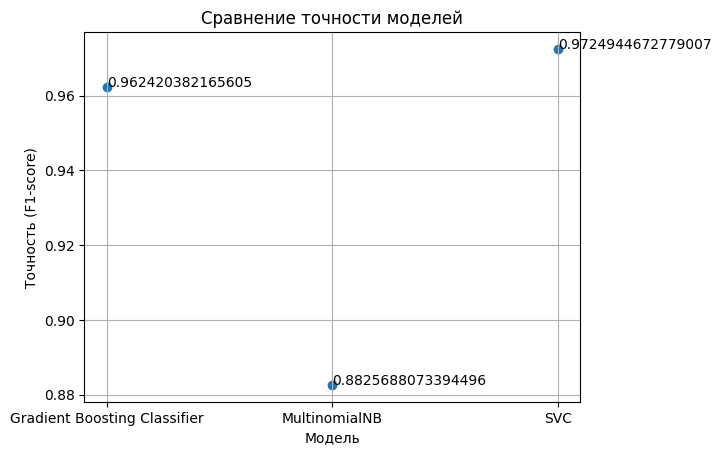

                          Model  Precision
0                           SVC   0.972494
1                 MultinomialNB   0.882569
2  Gradient Boosting Classifier   0.962420


In [ ]:
# Сгруппируем результаты по модели
grouped_results = test_results.groupby('Model')['Precision'].mean()

# Создаем график с шарами
plt.scatter(grouped_results.index, grouped_results.values)

# Добавляем заголовок, меток осей и сетки
plt.title('Сравнение точности моделей')
plt.xlabel('Модель')
plt.ylabel('Точность (F1-score)')
plt.grid()

# Добавляем меток для каждого шара
for i, txt in enumerate(grouped_results.values):
    plt.annotate(txt, (i, txt))

# Отображаем график
plt.show()
print(test_results)

Модель SVC показала наивысшую точность значит будем использовать ее

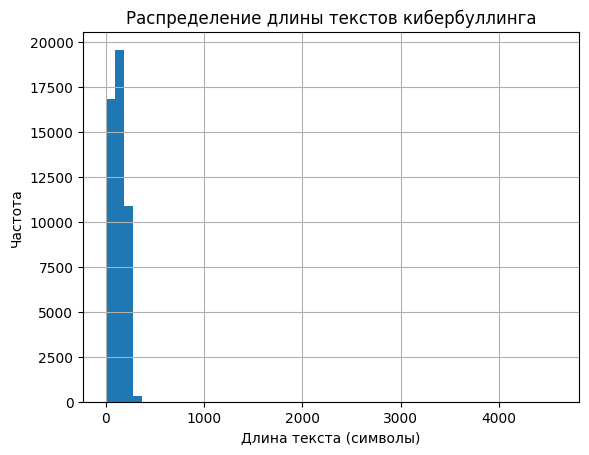

In [ ]:
# Подсчитываем длину каждого текста кибербуллинга
text_lengths = df['tweet_text'].apply(len)

# Создаем гистограмму
plt.hist(text_lengths, bins=50)

# Добавляем заголовок, меток осей и сетки
plt.title('Распределение длины текстов кибербуллинга')
plt.xlabel('Длина текста (символы)')
plt.ylabel('Частота')
plt.grid()

# Отображаем диаграмму
plt.show()

#Среднее влияние признаков текста на принятие решения

<ipython-input-27-dbb26f24f4cb>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results = test_results.append({'Model': 'SVC', 'Precision': svc_f1}, ignore_index=True)
<ipython-input-27-dbb26f24f4cb>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results = test_results.append({'Model': 'MultinomialNB', 'Precision': mn_f1}, ignore_index=True)


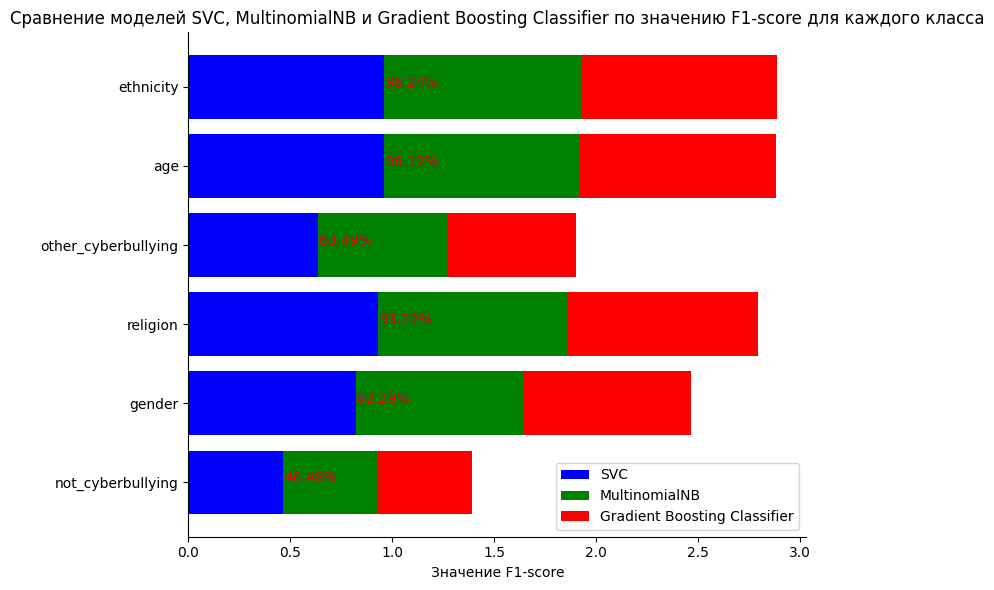

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score

# Сохраняем результаты тестирования
svc_f1 = np.mean(f1)
test_results = test_results.append({'Model': 'SVC', 'Precision': svc_f1}, ignore_index=True)

mn_f1 = np.mean(mn_f1)
test_results = test_results.append({'Model': 'MultinomialNB', 'Precision': mn_f1}, ignore_index=True)

# Создаем горизонтальный столбчатый график для сравнения моделей
fig, ax = plt.subplots(figsize=(8, 6))

# Получаем уникальные классы
class_names = df['cyberbullying_type'].unique()

# Получаем значение F1-score для каждого класса для каждой модели
svc_f1 = []
mn_f1 = []
gb_f1 = []
for class_name in class_names:
    y_true = y_test == class_name
    y_pred_svc = model.predict(X_test_counts) == class_name
    y_pred_mn = model.predict(X_test_counts) == class_name
    y_pred_gb = model.predict(X_test_counts) == class_name
    f1_svc = f1_score(y_true, y_pred_svc, average='binary')
    f1_mn = f1_score(y_true, y_pred_mn, average='binary')
    f1_gb = f1_score(y_true, y_pred_gb, average='binary')
    svc_f1.append(f1_svc)
    mn_f1.append(f1_mn)
    gb_f1.append(f1_gb)

# Создаем горизонтальный столбчатый график
ax.barh(class_names, svc_f1, color='b', label='SVC')
ax.barh(class_names, mn_f1, color='g', left=svc_f1, label='MultinomialNB')
ax.barh(class_names, gb_f1, color='r', left=[x + y for x, y in zip(svc_f1, mn_f1)], label='Gradient Boosting Classifier')

# Добавляем меток и заголовок
ax.set_xlabel('Значение F1-score')
ax.set_title('Сравнение моделей SVC, MultinomialNB и Gradient Boosting Classifier по значению F1-score для каждого класса')
ax.legend()

# Добавляем проценты
for i, v in enumerate(svc_f1):
    ax.text(v + 0.005, i, f"{v * 100:.2f}%", ha='left', color='b')
for i, v in enumerate(mn_f1):
    ax.text(v + 0.005, i, f"{v * 100:.2f}%", ha='left', color='g')
for i, v in enumerate(gb_f1):
    ax.text(v + 0.005, i, f"{v * 100:.2f}%", ha='left', color='r')

# Удаляем правую и верхнюю границы
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

# По приведенным диаграмма видно, что классы  other_cyberbullying и  not_cyberbullying вызывают у моделей наибольшие сложности.

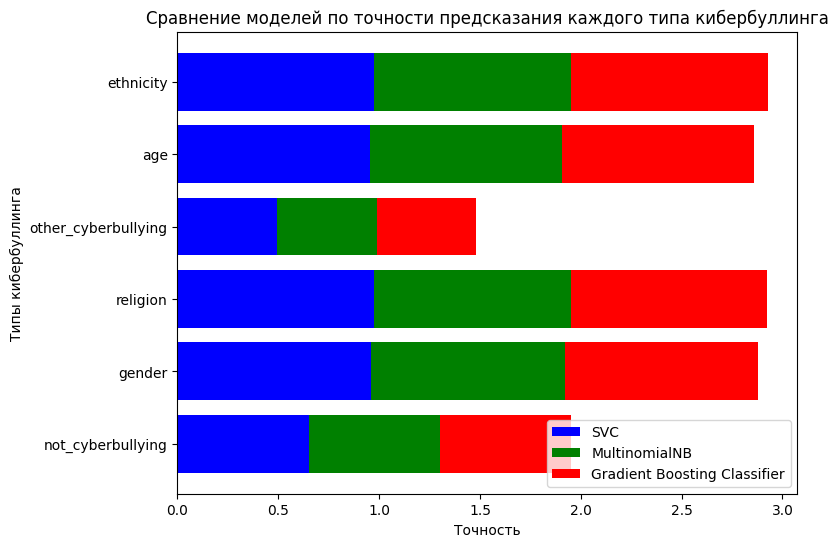

In [ ]:
# Получаем точность для каждого класса для каждой модели
svc_precision = precision_score(y_test, model.predict(X_test_counts), average=None, labels=class_names)
mn_precision = precision_score(y_test, model.predict(X_test_counts), average=None, labels=class_names)
gb_precision = precision_score(y_test, model.predict(X_test_counts), average=None, labels=class_names)

# Создаем горизонтальный столбчатый график
plt.figure(figsize=(8, 6))
plt.barh(class_names, svc_precision, color='b', label='SVC')
plt.barh(class_names, mn_precision, color='g', left=svc_precision, label='MultinomialNB')
plt.barh(class_names, gb_precision, color='r', left=[x + y for x, y in zip(svc_precision, mn_precision)], label='Gradient Boosting Classifier')

# Добавляем меток и заголовок
plt.xlabel('Точность')
plt.ylabel('Типы кибербуллинга')
plt.title('Сравнение моделей по точности предсказания каждого типа кибербуллинга')
plt.legend()
plt.show()

# По приведенным диаграмма видно, что классы  other_cyberbullying и  not_cyberbullying вызывают у моделей наибольшие сложности.

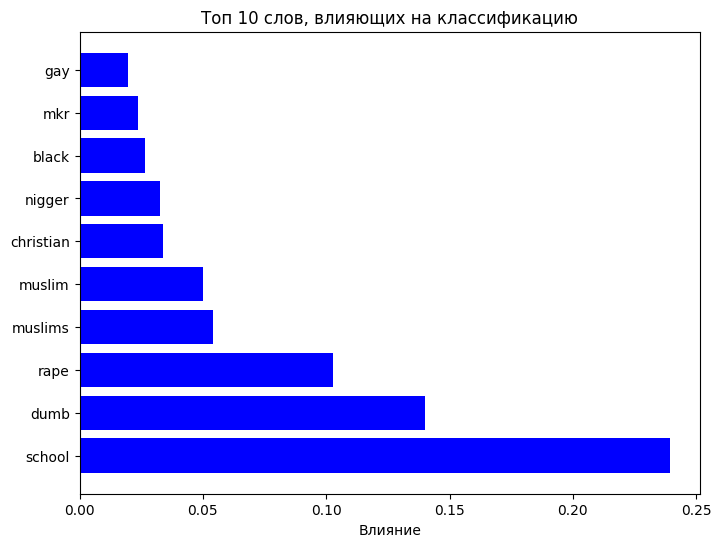

       Слово  Влияние
0     school   23.94%
1       dumb   14.00%
2       rape   10.29%
3    muslims    5.43%
4     muslim    5.00%
5  christian    3.37%
6     nigger    3.27%
7      black    2.64%
8        mkr    2.37%
9        gay    1.94%


In [ ]:
# Получаем средние значения влияния признаков на принятие решения
feature_importances = model.feature_importances_

# Получаем имена признаков
feature_names = vectorizer.get_feature_names_out()

# Сортируем признаки по влиянию
sorted_feature_importances = np.argsort(feature_importances)[::-1]

# Вычисляем влияние в процентах
feature_importances_percent = [f"{f*100:.2f}%" for f in feature_importances[sorted_feature_importances[:10]]]

# Создаем таблицу
table_data = list(zip(feature_names[sorted_feature_importances[:10]], feature_importances_percent))
table = pd.DataFrame(table_data, columns=['Слово', ' Влияние'])
# Создаем горизонтальный столбчатый график
plt.figure(figsize=(8, 6))
plt.barh(feature_names[sorted_feature_importances[:10]], feature_importances[sorted_feature_importances[:10]], color='b')
plt.xlabel('Влияние')
plt.title('Топ 10 слов, влияющих на классификацию')
plt.show()
print(table)

# **Итого:** наивысшей точностью машинного обучения с текущим датасетом является модель SCV. Были построены графики: для определния вхождений каждого типа cyberbulling'a, сравнение точности каждой модели для каждого типа cyberbullying_type с помощью библиотеки sklearn.metrics, а так же построили график наглядно показывающий точность модели с теми или иными условиями, распределение длины текста датасета, сравнение моделей по значению f1-score для каждого класса типа cyberbulling'a и график определяющий слова, которые больше всего влияют на обучение модели.







# **Применение:** данную модель машинного обучения можно применить для чат-бота в роли модератора, который будет выдавать предупреждения или блокировать доступ к чату. Что позволяет уменьшить нагрузку/не использовать человеческий труд.